<h1 align="center">Machine Learning Tutorial: Regression</h1>

### 1. What is Regression?
Regression analysis is the process to find the relationship between the ***dependent variable*** and the ***independent variable***.

Generally, regression analysis is mainly used for 2 completely different purposes:

1. ***Predict*** or ***estimate*** the future value/trend using the observed data. This is widely used in salary forecasting, price estimation, drug efficiency test and so on.

2. ***Reveal the causal relationships*** between the dependent and the independt variable (How one variable could influence the other).

Within the first condition, we have to carefully ***justify why the prediction using regression is valid and accurate***.

Within the second condition, we have to ***explain where this causal relationship comes from***.

There are lots of types of regression in the machine learning:

#### 1.1 Linear Regression and Multiple Linear Regression
As we mentioned before, the relationship within the linear regression model is strictly linear.

The difference between the linear regresssion and the multiple inear regression is that:

1. Within linear regression, the input x is a scalar number and the output y is also a scalar number.

2. Within multiple linear regression, the input x has multiple features (must be greater than 1) and the output y is a scalar number.

#### 1.2 Logistic Regression
The logistic regression use the sigmoid function $f(x)=\frac{1}{1+e^{-x}}$ to output a value between 0~1.

This regression model could be used to solve classification problems.

#### 1.3 Polynomial Regression
The polynomial regression model could learn a non-linear relationship $y=a_0+a_1x+a_2x^2...$

From the above equation we could see that, ***the original feature is transformed to polynomial features of given degrees and then the final relationship is modeled as a linear model.***

#### 1.4 Support Vector Regression (SVR)
This is very similar to the Support Vector Machine (which we covered in the classification tutorial) and slight modified to solve regression problems.

The core goal of SVR is that we want to have the maximum number of data points between the boundary lines and the best-fit line.

#### 1.5 Decision Tree Regression
This regression model use a tree-like structure to solve the problem.

Basically you will meet lots of "test" stored in the roots. You could choose branches based on the answer for each "test" and reach the leaf node which embeds the final answer.

#### 1.6 Ridge Regression (L2 Regularisation)
This is the more powerful and robust version of linear regression by adding the L2 regularisation term. We will return to this later.

#### 1.7 Lasso Regression (L1 Regularisation)
This is similar to the ridge regression but using L1 regularisation term instead.

### 2. What is Supervised Learning?
Supervised Learning is the machine learning task to learn a mapping between the input features and the output and the goal is to ***generalise from the training data to accurately find the result for unseen data***.

Here, we will start with the linear regression to help you understand more about the supervised learning and feel the power of regression.

### 3. Preparation

#### 3.1 Training, Validation and Test Sets (Very Important!!!)
As we have seen, the reason why machine learning algorithms could have this fancy performance is that generally they use a very large amount of data to "learn" how to sovle the problem.

Within this "learning" process, we could divide data into training, validation and test datasets for different purpose:

1. Training set ***(could "see", could "use" in the training)***: The model could access to those dataset to optimize the weights and do calculations in the training.

2. Validation set ***(could "see", can't "use" in the training)***: During the training, the model could only use the validation set to determine how good it could perform.

3. Test set ***(can't "see", can't "use" in the training)***: After training, the model could use the test set to determine how good it could perform on the unseen data.

The validation set and test set are very similar as they are both used for evaluating the accuracy of the model. However, the key difference is that (very important!!!):

1. ***Validation set could be used during the training process, which means you could observe the loss information and tune the hyperparameters but can't use it for optimisation and calculation.***

2. ***Test set could only be used after the training is finished. It is used to check how the model could perform on absolutely unseen data. In other words, you can't do any modification to the model once you use the test set.***

#### 3.2 Loss Function
Loss is defined as the difference between the predicted result and the true value, which could be used to measure the distance between points in the feature spaces.

A valid loss function must obey the following rules:

1. The result is non-negative.

2. The loss/distance is symmetric: $Loss(A, B)=Loss(B, A)$

3. Triangular Inequality: $Loss(A,C) \leqslant Loss(A,B)+Loss(B,C)$ for any possible A, B, C

##### 3.2.1 Square Loss
Within this tutorial, we will simple use the square loss as our loss function: $Loss(x,y)=(x-y)^2$.

There are lots of loss function choices, but one reason why we use square loss is that: ***The higher the difference is, the much more penalty would produce.***

#### 3.3 Error
Error is the deviation between the observed result and the ideal truth value.

Within the regression model, there are 2 main types of errors:

1. Structual Erorr: This error raises when the chosen model is not complex enough for the dataset (use linear regression model to predict a polynomial trend).

2. Estimation Error: This error raises when the training dataset is not sufficient (can't find the right line expression even through the trend is linear).

The structual error could be solved by ***plotting the data if possible to visually determine the trend and the degree of the relationship.***

The estimation error could be sovled by ***collecting more data to enlarge the training set***.

#### 3.4 Empirical Risk
Although we could train our model to work well on our training/validation sets, we absolutely have no idea how it could perform on the real unseen data.

To tackle this problem, we have to use the principle of empirical risk minimisation here.

Empirical risk could estimate how the model might perform on the unseen data using the accuracy on the observed dataset.

Empirical risk is mathematically defined as: $R(model)=\frac{1}{N}\sum_{i=1}^{N} Loss(y_i , model(x_i))$

This means that our most expected model should be able to minimize the empirical risk.

#### 3.5 Gradient Descent: Concept (Very Important!)
Gradient descent is a very efficient and powerful method used during the optimisation in the machine learning algorithm.

The goal of optimisation is ***to find the local minimum (global minimum if you are super lucky) of the loss function to get a more accurate model***.

Imagine you are on a mountain and you want to go back to the bottom of the mountain. Here is a list of what you might do:

1. Find the path pointing downwards, which is the inverse way of the path you climbed up ***(Find the negative of the gradient of the loss function at the certain point).***

2. Go down towards the buttom by one step ***(Update the loss by using multiplying the negative gradient and the learning rate).***

3. Repeat step 1 and 2 until you reach the buttom ***(For each epoch, find the new gradient and update the loss using that).***

We will explain this more in the gradient-based method part later.

![Gradient Descent](https://miro.medium.com/max/1400/1*G1v2WBigWmNzoMuKOYQV_g.png "Gradient Descent")

#### 3.6 Closed Solution

As we know, the local minimum occurs when the first-derivative is equal to 0 in a convex function.

This means that we could directly solve the optmized solution using this principle for linear regression and multiple linear regression.

Our following part is under the setting of multiple linear regression, we encourage you to analyse the linear regression model first, which is very easy.

##### 3.6.1 Problem Definition

Within multiple linear regression, we want to use $(x_1, x_2, ... x_N)$ and $(y_1, y_2, ... y_N)$ to learn the mapping: $y=\theta \cdot x$ where $x$ is a D-dimensional vector and $y$ is a scalar.

Here we use $\theta$ to represent the weight of the model so $y=\theta \cdot x$ is equivalent to: $y=model(x)$

Recalling from the previous part, the empirical risk is: $R(\theta)=\frac{1}{N}\sum_{i=1}^{N} Loss(y_i-\theta \cdot x_i)$

To simplify the calculation, we will use the 0.5*Square Loss as our loss function (You will feel the power soon).

Combining all information, our final objective function is: $R(\theta)=\frac{1}{N}\sum_{i=1}^{N} \frac{1}{2}(y_i-\theta \cdot x_i)^2$

The above equation is exactly equivalent to 0.5*Mean Square Error (MSE).

##### 3.6.2 Detailed Calculation
Taking the first derivative with respect to $\theta$, we could get: $\nabla _\theta R(\theta)=-\frac{1}{N}\sum_{i=1}^{N} (y_i-\theta \cdot x_i)x_i$

Simplify the expression we could get: $\nabla _\theta R(\theta)=-\frac{1}{N}\sum_{i=1}^{N} y_ix_i + \frac{1}{N}\sum_{i=1}^{N} \theta \cdot x_ix_i$

he term $\frac{1}{N}\sum_{i=1}^{N} \theta \cdot x_ix_i$ could be re-written as $\frac{1}{N}\sum_{i=1}^{N} x_i\theta \cdot x_i = \frac{1}{N}\sum_{i=1}^{N} x_i(x_i)^T\theta$ 

If we let $A=\frac{1}{N}\sum_{i=1}^{N} x_i(x_i)^T$ and $b=-\frac{1}{N}\sum_{i=1}^{N} y_ix_i$, the above equation could be simply written as: $\nabla _\theta R(\theta)=-b+A\theta$

Our final solution is: $\theta=A^{-1}b$

##### 3.6.3 Detaild Calculation in Matrix Form
To process a large amout of data with lots of features, we have to store them as a big matrix.

Within the multiple linear regression, we store:

1. N different y values as a (N,1) matrix $Y$

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}$$

2. N different x values with d features as a (N,d+1) matrix $X$

$$\begin{bmatrix}
1 & x_{1,1} & x{1,2} & \dots & x_{1,d} \\
1 & x_{2,1} & x{2,2} & \dots & x_{2,d} \\
\vdots & \vdots & \vdots & \dots & \vdots \\
1 & x_{N,1} & x{N,2} & \dots & x_{N,d} \\
\end{bmatrix}$$

3. $\theta$ as (d+1, 1) matrix

$$\begin{bmatrix} \theta _0 \\ \theta _1 \\ \vdots \\ \theta _N \end{bmatrix}$$

In this way, we could have $X\theta =\theta _0+\sum_{i=1}^{d} \theta _ix_i$

Our empirical risk function could be expressed as $R(\theta)=\frac{1}{N}(Y-X\theta)^T(Y-X\theta)=\frac{1}{N}(Y^TY-Y^TX\theta-\theta ^TX^TY+\theta ^TX^TX\theta)$

Notice that $Y^TX\theta$ is a scalar, for any scalar $r$ we have $r^T=r$

So $Y^TX\theta=(Y^TX\theta)^T=\theta ^TX^TY$

So $R(\theta)=\frac{1}{N}(Y^TY-2\theta ^TX^TY+\theta ^TX^TX\theta)$

Taking the derivative with respect to $\theta$, we could get $\nabla _\theta R(\theta)=-2X^TY+2X^TX\theta$

Solve the above equation we could get: $\theta=(X^TX)^{-1}X^TY$

##### 3.6.4 Further Analysis
No worry if you can't understand all detailed calculations above. What you need to know is that we could find the solution directly by solving the differential equation.

But can we always use this method? The answer is NO.

Recalling back from the section 3.6.2, we have the final solution $\theta=A^{-1}b$

This solution is only valid if we could find the inverse matrix of $A$

This means that ***If we don't have enough training set (which could decrease the rank of A), we still can't find the closed solution.***

Besides this, ***the computational cost for matrix calculation is very high so it is definitely not a good idea to find the closed solution for a large amount of data.***

To tackle those problems, we could use gradient descent based method instead!

#### 3.7 Gradient Descent Based Method
We could use gradient descent based method instead as it could save a lot of time while keeping a relatively high accuracy.

The gradient descent based method contains the following main steps:

1. Randomly choose t points from the total N points as the training set and the rest could form the validation set.

2. Calculate the training loss using the current model and training set.

3. Calculate the validation loss using the current model and validation set.

4. Update the model according to the current gradient information. 

5. Repeat step 1 to 4 until reaching the maximum number of epoch.

##### 3.7.1 Detailed Gradient Descent Method Analysis
The general equation to optimize the model is: $\theta=\theta - rate\cdot\nabla _\theta R(\theta)$

Our objective function (empirical risk) is: $R(\theta)=\frac{1}{N}\sum_{i=1}^{N} \frac{1}{2}(y_i-\theta \cdot x_i)^2$

Taking the first derivative with respect to $\theta$: $\nabla _\theta R(\theta)=-\frac{1}{N}\sum_{i=1}^{N} (y_i-\theta \cdot x_i)x_i = \frac{1}{N}\sum_{i=1}^{N} (\theta \cdot x_i-y_i)x_i$

Taking the learning rate into account: $\theta _{new}=\theta -rate\cdot\frac{1}{N}\sum_{i=1}^{N} (\theta \cdot x_i-y_i)x_i$

Theoretically, we need to use the entire dataset to compute gradient accurately and optimize the model. However, this could be painful if we have lots of data.

Alternatively, we could estimate the gradient by calculating the accurate gradient at a specific chosen point, which is known as stochastic gradient descent (SGD).

This method could significantly decrease the computational cost and it makes lots of machine learning and deep learning algrotihms powerful.

Because we are only interested in one specfic point, we could simplify it into: $\theta _{new}=\theta -rate\cdot(\theta \cdot x_i-y_i)x_i$ where $i$ is randomly chosen from the training set.

***We just introduce the concept of stochastic gradient descent (SGD) here but still use the whole dataset for gradient calculation, as I found out that SGD didn't work well when writing this tutorial.***

#### 3.8 Regularisation
Regularisation could be considered as a resistance for model to perfectly fit the training data.

If our model could perfectly fit the training data (very low training loss), this means that it could also fit the noise within the training set very well and generally can't predict the result for unseen data.

By adding the regularisation term, only a very big change could update the model, which makes it more robust and stable.

##### 3.8.1 Gradient Descent Based Method with Regularisation (L2)
Within this tutorial, we will focus on the L2 Regularisation.

The new objective function becomes: $J_ {\lambda, N}(\theta)=\frac{\lambda}{2} \lVert \theta \rVert_2^2 + R(\theta)=\frac{\lambda}{2}\sum_{i=0}^N \theta _i ^2 + R(\theta)$

Similarly, by taking the first derivative with respect to $\theta$ and only interested in one point, we could get: $\theta _{new}=(1-rate\cdot\lambda)\theta -rate\cdot\frac{1}{N}\sum_{i=1}^{N} (\theta \cdot x_i-y_i)x_i$

#### 3.9 Performance Evaluation
There are some common used evaluation metrics we could use to evaluate the performance of our linear regression model.

##### 3.9.1 Mean Square Error (MSE) and Root Mean Square Error (RMSE)
MSE and RMSE could directly compute the difference between the prediction and the truth value. 

RMSE is just simply the root of MSE.

##### 3.9.2 Coefficient of Determination ($R^2$)
$R^2$ the proportion of the variation in the dependent variable that is predictable from the independent variables.

It could measure how well the predictions could approximate hte real data points.

The more the score is close to 1, the better performance our linear regression model have.

This is calculated by: $R^2=1-\frac{SS_{residual}}{SS_{total}}$ where $SS_{residual}=\sum_{i} (y_i-\theta x_i)^2$ and $SS_{total}=\sum_{i} (y_i-\bar{y})^2$

### 4. Linear Regression from Scratch
For this tutorial, we are going to solve the Boston House Price Estimation problem step by step.

We will directly start implementing the multiple linear regression algorithm as it could be also applied to linear regression problem.

#### 4.1 Dataset Loading
The whole dataset contains 506 houses with 13 different features:

1. CRIM: the per capita crime rate of the town

2. ZN: the proportion of residential land zoned for lots over 25,000 sq.ft

3. INDUS: the proportion of non-retail nusiness acres per town

4. CHAS: Charles River dummy variable (1 if tract bounds river, 0 otherwise)

5. NOX: nitric oxides concentration (parts per 10 million)

6. RM: average number of rooms per dwelling

7. AGE: the proportion of owner-occupied units built prior to 1940

8. DIS: weighted distances to five Boston emplyment centers

9. RAD: index of accessibility to radial highways

10. TAX: full-value property-tax rate per $10,000

11. PTRATIO: pupil-teacher ratio by town

12. B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

13. LSTAT: Percentage of lower status of the population

Out target is MEDV, the median value of owner-occupied homes in $1000s

In [1]:
from sklearn.datasets import load_boston

def loadBoston():
    '''
        Load the boston house price dataset and return points
    and labels separately

    Return:
        dataset: np.ndarray, all houses with 13 features, (the number of houses, the number of features for each house)
        label: np.ndarray, all corresponding prices, ideally (the number of houses, 1)
    '''
    # load_boston() could direcly load the dataset into the required form
    # For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
    dataset, label=load_boston(return_X_y=True)

    # Here we reshape the label so it is a 2D array instead of 1D
    # np.reshape() could be used to change the shape of the array
    # "-1" means to be calculated by the parameter at this position is calculated automatically
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
    return dataset, label.reshape(-1,1)

dataset, label=loadBoston()
print(f"There are {dataset.shape[0]} houses within the dataset and each house has {dataset.shape[1]} features.")
print(f"There are also {label.shape[0]} corresponding prices.")

There are 506 houses within the dataset and each house has 13 features.
There are also 506 corresponding prices.


After loading the dataset, we need to insert a column of "1" at the beginning of dataset to change the shape into (N, d+1).

In [2]:
import numpy as np

def addColumn(dataset):
    '''
        Add a column of "1" to the beginning of the dataset
    to change the shape into (N, d+1)

    Argument:
        dataset: np.ndarray, all houses with 13 features, (the number of houses, the number of features for each house)
    
    Return:
        result: np.ndarray, dataset with an extra column, (the number of houses, the number of features for each house+1)
    '''
    # np.ones() could be used to construct an array full of 1 with the given shape
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.ones.html
    column=np.ones((1, dataset.shape[0]))
    
    # np.insert() could be used to insert the column at the specific position
    # obj=0 means we want to insert at the index 0
    # axis=1 means we want to insert a column
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.insert.html?highlight=insert#numpy.insert
    return np.insert(dataset, 0, column, axis=1)

dataset, label=loadBoston()
modifiedDataset=addColumn(dataset)
print(f"After modification, there are {modifiedDataset.shape[0]} houses now and each house has {modifiedDataset.shape[1]} features.")
print(f"The first feature value of the house is: {modifiedDataset[0][0]}")

After modification, there are 506 houses now and each house has 14 features.
The first feature value of the house is: 1.0


#### 4.2 $\theta$  Initialisation
For the gradient descent based method, we need to have an initial $\theta$ matrix, which is full of zero with shape (d+1, 1).

In [3]:
def initialiseTheta(dataset):
    '''
        Initialise and return the theta matrix according to the shape of the dataset
    
    Argument:
        dataset: np.ndarray, dataset with an extra column, (the number of houses, the number of features for each house+1)
    
    Return:
        theta: np.ndarray, full of 0, (the number of features for each house+1,1)
    '''
    # np.zeros could be used to construct an array full of 0 with the given shape
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html?highlight=zeros#numpy.zeros
    return np.zeros((dataset.shape[1], 1))

dataset, label=loadBoston()
modifiedDataset=addColumn(dataset)
theta=initialiseTheta(modifiedDataset)
print(f"The shape of the initial theta is: {theta.shape}")

The shape of the initial theta is: (14, 1)


#### 4.3 Closed Solution (No Regularisation)
As we mentioned in the section 3.6.3, our solution could be directly found by $\theta=(X^TX)^{-1}X^TY$ 

In [4]:
import numpy as np

from numpy.linalg import LinAlgError

def closedSolution(dataset, label):
    '''
        Return the optimized linear regression model by 
    substituting into the closed form solution

        Report when the inverse matrix can't be found

    Argument:
        dataset: np.ndarray, dataset with an extra column, (the number of houses, the number of features for each house+1)
        label: np.ndarray, all corresponding prices, ideally (the number of houses, 1)

    Return:
        result: np.ndarray, the optimized theta for the dataset, (the number of features for each house+1,1)
    '''
    try:
        # np.linalg.inv() could find the inverse matrix of the given input matrix
        # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

        # np.matmul() could calculate the normal matrix multiplication
        # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.matmul.html

        # np.transpose() could find the transpose matrix of the input matrix
        # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
        firstPart=np.linalg.inv(np.matmul(np.transpose(dataset), dataset))
        secondPart=np.matmul(np.transpose(dataset), label)
        return np.matmul(firstPart, secondPart)
    except LinAlgError:
        print("Can't find the closed solution due to invalid matrix inversion.")

# np.random.rand() could be used to generate a random array with given shape
# For more information, please check: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

# Here we test N=3, d+1=4 and we expect a (4,1) result
testX=np.random.rand(3,4)
testLabel=np.random.rand(3,1)
print(f"The shape of the result is: {closedSolution(testX, testLabel).shape}")

The shape of the result is: (4, 1)


#### 4.4 Gradient Descent Based Method (No Regularisation)

##### 4.4.1 Split Training, Validation and Test Set
As mentioned in the section 3.7, the training set is randomly selected and the rest is chosen as validation set.

Normally, we could divide the whole dataset into 70% as training set, 20% as validation set and 10% as test set.

This means that both training and validation sets are different for each epoch but the test set is unchanged.

Other different proportions could also work but we need to make sure we do have enough training set.

In [5]:
import numpy as np
import random

def splitDataset(dataset, label, trainProportion, validationProportion):
    '''
        Split and return the training, validation and test dataset and corresponding
    labels as a dictionary according to the given proportion

        The test set is always the last proportion of dataset and the rest
    are used for choosing training and validation sets

        The training and validation sets are randomly chosen every time

        The train_test_split() fnuction in Sklearn API could randomly split the dataset
    into training and test sets.
        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
    
    Argument:
        dataset: np.ndarray, dataset with an extra column, (the number of houses, the number of features for each house+1)
        label: np.ndarray, all corresponding prices, ideally (the number of houses, 1)
        trainProportion: float, the proportion of training set, from 0 to 1
        validationProportion: float the proportion of validation set, from 0 to 1

    Return:
        result: dictionary, contains the training/validation/test points and corresonding labels as key-value pairs
    '''
    result={}

    # Find the number of points within training, validation and test sets
    trainNumber=int(dataset.shape[0]*trainProportion)
    validationNumber=int(dataset.shape[0]*validationProportion)
    testNumber=dataset.shape[0]-trainNumber-validationNumber

    # Initilise a list containing all available indexes in the rest part
    restIndex=[i for i in range(trainNumber+validationNumber)]
    
    # We want randomly choose a number of indexes to construct the training set
    # random.sample() could randomly choose the given number of elements from the list without replacement
    # For more information, please check: https://docs.python.org/3/library/random.html
    trainIndex=random.sample(restIndex, trainNumber)

    # The indexes within the validation set is the left part of restIndex which is not in the training set
    validationIndex=[index for index in restIndex if index not in trainIndex]

    # Add the right points and the corresonding labels to the result
    result["trainPoint"]=dataset[trainIndex]
    result["trainLabel"]=label[trainIndex]

    result["validationPoint"]=dataset[validationIndex]
    result["validationLabel"]=label[validationIndex]

    result["testPoint"]=dataset[-testNumber:]
    result["testLabel"]=label[-testNumber:]

    return result

dataset, label=loadBoston()
modifiedDataset=addColumn(dataset)
result=splitDataset(modifiedDataset, label, 0.7, 0.2)

trainPoint, trainLabel=result["trainPoint"], result["trainLabel"]
validationPoint, validationLabel=result["validationPoint"], result["validationLabel"]
testPoint, testLabel=result["testPoint"], result["testLabel"]

print(f"There are {trainPoint.shape[0]} houses in the training set and each house has {trainPoint.shape[1]} features.")
print(f"There are {trainLabel.shape[0]} corresponding prices in the training set.")
print(" ")
print(f"There are {validationPoint.shape[0]} houses in the validation set and each house has {validationPoint.shape[1]} features.")
print(f"There are {validationLabel.shape[0]} corresponding prices in the validation set.")
print(" ")
print(f"There are {testPoint.shape[0]} houses in the test set and each house has {testPoint.shape[1]} features.")
print(f"There are {testLabel.shape[0]} corresponding prices in the test set.")

There are 354 houses in the training set and each house has 14 features.
There are 354 corresponding prices in the training set.
 
There are 101 houses in the validation set and each house has 14 features.
There are 101 corresponding prices in the validation set.
 
There are 51 houses in the test set and each house has 14 features.
There are 51 corresponding prices in the test set.


##### 4.4.2 Find Prediction Using $\theta$
The prediction could be simply calculate by the matrix multiplication between $\theta$ and $X$.

In [6]:
def predict(input, theta):
    '''
        Return the corresponding result by matrix multiplication
    
    Argument:
        input: np.ndarray, arbitrary number of house information, (arbitrary number, the number of features for each house+1)
        theta: np.ndarray, represents the linear relationship within the dataset, (the number of features for each house+1, 1)
    
    Return:
        result: np.ndarray, the predicted prices, (arbitrary number, 1)
    '''
    # The order of theta and input is very important
    return np.matmul(input, theta)

testInput=np.random.rand(5,6)
testTheta=np.random.rand(6,1)
result=predict(testInput, testTheta)
print(f"The shape of the prediction is: {result.shape}")

The shape of the prediction is: (5, 1)


##### 4.4.3 Mean Square Error (MSE)
As mentioned in the section 3.6.1, our empirical risk is equivalent to 0.5*MSE.

In [7]:
import numpy as np

def MSE(prediction, target):
    '''
        Return the MSE between the prediction and the target.

        This function could be used for multiple 1-feature result.
    
    Argument:
        prediction: np.ndarray, prediction made by the model, (the number of houses, 1)
        target: np.ndarray, the corresponding truth value, (the number of houses, 1)
    '''
    # Find the difference vector between the prediction and the target
    difference=prediction-target
    
    # Square the difference vector
    # np.squrare() could square every element within the vector
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.square.html
    differenceSquare=np.square(difference)

    # Find the mean of the squared difference
    # np.mean() could find the mean of elements in the given axis
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.mean.html
    return np.mean(differenceSquare)

prediction=np.array([1,2,3])
target=np.array([4,5,6])
print(f"The MSE loss between the prediction and the target is: {MSE(prediction, target)}")

The MSE loss between the prediction and the target is: 9.0


##### 4.4.4 Update the $\theta$ Using Gradient
As mentioned in the section 3.7.1, we could optimise the $\theta$ by using: $\theta _{new}=\theta -rate\cdot\frac{1}{N}\sum_{i=1}^{N} (\theta \cdot x_i-y_i)x_i$

This is equivalent to: $\theta _{new}=\theta -rate\cdot\frac{1}{N}X^T(X\theta-Y)$

In [8]:
def updateTheta(trainPoint, trainLabel, currentTheta, learningRate):
    '''
        Update and return the new theta according to the optimisation rule
    
    Argument:
        trainPoint: np.ndarray, the training set, (the number of points in the training set, the number of features for each house+1)
        trainLabel: np.ndarray, the corresponding training label, (the number of points in the training set, 1)
        currentTheta: np.ndarray, the current theta before optimisation, (the number of features for each house+1, 1)
        learningRate: float, determine the step size along the gradient direction in the gradient descent

    Return:
        result: np.ndarray, the updated theta, (the number of features for each house+1, 1)
    '''
    # np.dot() could be used to calculate the dot product of the 2 inputs
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.dot.html
    
    # Find the prediction
    prediction=predict(trainPoint, currentTheta)
    # Find the gradient
    gradient=np.dot(np.transpose(trainPoint), (prediction-trainLabel))/trainLabel.shape[0]
    
    # Update and return the new theta
    return currentTheta-learningRate*gradient

testX=np.random.rand(3, 10)
testY=np.random.rand(3, 1)
testTheta=np.random.rand(10, 1)
learningRate=0.1
updatedTheta=updateTheta(testX, testY, testTheta, learningRate)
print(f"The original theta has the shape: {testTheta.shape}")
print(f"The upated theta has the shape: {updatedTheta.shape}")

The original theta has the shape: (10, 1)
The upated theta has the shape: (10, 1)


##### 4.4.5 Plot Training Loss and Validation Loss
We need a function to plot the training and validation loss in the same graph.

In [9]:
import matplotlib.pyplot as plt

def plotLoss(trainLoss, validationLoss, name):
    '''
    Plot the training loss and validation loss side by side

    Argument:
        trainLoss: list, contains the training loss at every epoch
        validationLoss: list, contains the validation loss at every epoch
        name: string, the name of the plot
'''
    plt.subplot(1, 2, 1)
    plt.plot(trainLoss)
    plt.title("Train Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")

    plt.subplot(1, 2, 2)
    plt.plot(validationLoss)
    plt.title("Validation Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")

    plt.suptitle(name)
    plt.show()

##### 4.4.6 Evaluation Metrics (MSE and $R^2$ Score)

We will use MSE and $R^2$ score as our evaluation metrics.

We have previously implemented the MSE so we could directly use it here.

$R^2$ score is calculated by: $R^2=1-\frac{SS_{residual}}{SS_{total}}$ where $SS_{residual}=\sum_{i} (y_i-\theta x_i)^2$ and $SS_{total}=\sum_{i} (y_i-\bar{y})^2$

In [10]:
import numpy as np

from sklearn.metrics import r2_score

def evaluate(prediction, target, name):
    '''
        Evaluate and report the MSE and R2 score
    between the prediction and the target

        The R2 score is implemented by using: sklearn.metrics.r2_score()
        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

    Argument:
        prediction: np.ndarray, prediction made by the model, (the number of houses, 1)
        target: np.ndarray, the corresponding truth value, (the number of houses, 1)
        name: string, the name of the model
    '''
    # Find the MSE between the prediction and the target
    mse=MSE(prediction, target)
    
    # Find the R2 score between the prediction and the target
    r2=r2_score(prediction, target)
    
    print("")
    print(f"The {name} method got MSE: {mse}")
    print(f"The {name} method got R2 score: {r2}")


##### 4.4.6 Final Implementation
As mentioned in the section 3.7, the algorithm contains the following main steps:

1. Randomly choose t points from the total N points as the training set and the rest could form the validation set.

2. Calculate the training loss using the current model and training set.

3. Calculate the validation loss using the current model and validation set.

4. Update the model using the current gradient information.

5. Repeat step 1 to 4 until reaching the maximum number of epoch.

In [11]:
import random

def linearRegression(dataset, label, epoch, learningRate, trainProportion, validationProportion, plot=True):
    '''
        Run the multiple linear regression algorithm using the gradient descent method
    
    Argument:
        dataset: np.ndarray, all houses with 13 features, (the number of houses, the number of features for each house)
        label: np.ndarray, all corresponding prices, ideally (the number of houses, 1)
        epoch: int, the maximum number of repeats to run
        learningRate: float, determine the step size along the gradient direction in the gradient descent
        trainProportion: float, the proportion of training set, from 0 to 1
        validationProportion: float the proportion of validation set, from 0 to 1
        plot: boolean, True if plotting the training and validation loss

    Return:
        theta: np.ndarray, represents the linear relationship within the dataset, (the number of features for each house+1, 1)
    '''
    # Initialise the training loss and validation loss
    trainLoss, validationLoss=[], []
    # Initialise the theta (full of 0)
    theta=initialiseTheta(dataset)

    # Repeat the calculation until reaching the maximum number of epoch
    for i in range(epoch):
        # Randomly construct the training and validation sets
        data=splitDataset(dataset, label, trainProportion, validationProportion)

        # Find the prediction for the training set using the current theta
        trainPrediction=predict(data["trainPoint"], theta)

        # Calculate and store the training loss for this epoch
        trainLossEpoch=0.5*MSE(trainPrediction, data["trainLabel"])
        trainLoss.append(trainLossEpoch)

        # Find the prediction for the validation loss for this epoch
        validationPrediction=predict(data["validationPoint"], theta)

        # Calculate and store the validation loss for this epoch
        validationLossEpoch=0.5*MSE(validationPrediction, data["validationLabel"])
        validationLoss.append(validationLossEpoch)

        # Update the theta according to the gradient
        theta=updateTheta(data["trainPoint"], data["trainLabel"], theta, learningRate)
    
    # Finish training here
    # Plot the training and validation loss if required
    if plot:
        plotLoss(trainLoss, validationLoss, "Linear Regression from Scartch with No Regularisation")
    
    # Evaluate the model
    testPrediction=predict(data["testPoint"], theta)
    evaluate(testPrediction, data["testLabel"], "linear regression from scratch")

    return theta

#### 4.5 Gradient Descent Based Method (Ridge Regression)
To add this L2 regularisation into account, we could just slightly modify the updateTheta() function.

After adding the L2 regularisation, we could use $\theta _{new}=(1-rate\cdot\lambda)\theta -rate\cdot\frac{1}{N}\sum_{i=1}^{N} (\theta \cdot x_i-y_i)x_i$ to update the theta.

This is equivalent to: $\theta _{new}=(1-rate\cdot\lambda)\theta -rate\cdot\frac{1}{N}X^T(X\theta-Y)$

In [12]:
import random

def updateThetaRidge(trainPoint, trainLabel, currentTheta, learningRate, regularisationCoefficient):
    '''
        Update and return the new theta according to the optimisation
    rule with L2 regularisation
    
    Argument:
        trainPoint: np.ndarray, the training set, (the number of points in the training set, the number of features for each house+1)
        trainLabel: np.ndarray, the corresponding training label, (the number of points in the training set, 1)
        currentTheta: np.ndarray, the current theta before optimisation, (the number of features for each house+1, 1)
        learningRate: float, determine the step size along the gradient direction in the gradient descent
        regularisationCoefficient: float, determine how strong the regularisation term could influence the gradient update

    Return:
        result: np.ndarray, the updated theta, (the number of features for each house+1, 1)
    '''
    # Find the prediction
    prediction=predict(trainPoint, currentTheta)
    # Find the gradient
    gradient=np.dot(np.transpose(trainPoint), (prediction-trainLabel))/trainLabel.shape[0]
    # Update and return the new theta
    return (1-regularisationCoefficient*learningRate)*currentTheta-learningRate*gradient

def ridgeRegression(dataset, label, epoch, learningRate, regularisationCoefficient, trainProportion, validationProportion, plot=True):
    '''
        Run the multiple linear regression algorithm with L2 regularisation
    using the gradient descent method
    
    Argument:
        dataset: np.ndarray, all houses with 13 features, (the number of houses, the number of features for each house)
        label: np.ndarray, all corresponding prices, ideally (the number of houses, 1)
        epoch: int, the maximum number of repeats to run
        learningRate: float, determine the step size along the gradient direction in the gradient descent
        regularisationCoefficient: float, determine how strong the regularisation could effect the optimisation
        trainProportion: float, the proportion of training set, from 0 to 1
        validationProportion: float the proportion of validation set, from 0 to 1
        plot: boolean, True if plotting the training and validation loss

    Return:
        theta: np.ndarray, represents the linear relationship within the dataset, (the number of features for each house+1, 1)
    '''
    # Initialise the training loss and validation loss
    trainLoss, validationLoss=[], []
    # Initialise the theta (full of 0)
    theta=initialiseTheta(dataset)

    # Repeat the calculation until reaching the maximum number of epoch
    for i in range(epoch):
        # Randomly construct the training and validation sets
        data=splitDataset(dataset, label, trainProportion, validationProportion)

        # Find the prediction for the training set using the current theta
        trainPrediction=predict(data["trainPoint"], theta)

        # Calculate and store the training loss for this epoch
        trainLossEpoch=0.5*MSE(trainPrediction, data["trainLabel"])
        trainLoss.append(trainLossEpoch)

        # Find the prediction for the validation loss for this epoch
        validationPrediction=predict(data["validationPoint"], theta)

        # Calculate and store the validation loss for this epoch
        validationLossEpoch=0.5*MSE(validationPrediction, data["validationLabel"])
        validationLoss.append(validationLossEpoch)

        # Update the theta according to the gradient with L2 regularisation
        theta=updateThetaRidge(data["trainPoint"], data["trainLabel"], theta, learningRate, regularisationCoefficient)
    
    # Finish training here
    # Plot the training and validation loss if required
    if plot:
        plotLoss(trainLoss, validationLoss, "ridge regression from scartch")
    
    # Evaluate the model
    testPrediction=predict(data["testPoint"], theta)
    evaluate(testPrediction, data["testLabel"], "ridge regression from scratch")

    return theta

### 5. Linear Regression with No Regularisation Using Sklearn
Scikit-learn is a popular API for machine learning in Python. We could easily build the linear regression model using it.

In [13]:
from sklearn.linear_model import LinearRegression

def linearRegressionSklearn(dataset, label, trainProportion, validationProportion):
    '''
        Run the multiple linear regression algorithm using scikit-learn

        We train the same amount of data and use the same test set for fair
    comparison

        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

    Argument:
        dataset: np.ndarray, all houses with 13 features, (the number of houses, the number of features for each house)
        label: np.ndarray, all corresponding prices, ideally (the number of houses, 1)
        trainProportion: float, the proportion of training set, from 0 to 1
        validationProportion: float the proportion of validation set, from 0 to 1

    Return:
        model: sklearn.linear_model._base.LinearRegression, the optimised model
    '''
    data=splitDataset(dataset, label, trainProportion, validationProportion)

    # Initialise a linear regression model using sklearn
    model=LinearRegression()
    # Fit the model using the training set
    model.fit(data["trainPoint"], data["trainLabel"])

    # Get prediction and evaluate the model
    testPrediction=model.predict(data["testPoint"])
    evaluate(testPrediction, data["testLabel"], "linear regression using sklearn")
    
    return model

### 6. Ridge Regression Using Sklearn
We could also simply build the ridge regression model using scikit-learn API.

In [14]:
from sklearn.linear_model import Ridge

def ridgeRegressionSklearn(dataset, label, regularisationCoefficient, trainProportion, validationProportion):
    '''
        Run the ridge regression algorithm using scikit-learn

        We train the same amount of data and use the same test set for fair
    comparison

        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

    Argument:
        dataset: np.ndarray, all houses with 13 features, (the number of houses, the number of features for each house)
        label: np.ndarray, all corresponding prices, ideally (the number of houses, 1)
        regularisationCoefficient: float, determine how strong the regularisation could effect the optimisation
        trainProportion: float, the proportion of training set, from 0 to 1
        validationProportion: float the proportion of validation set, from 0 to 1

    Return:
        model: sklearn.linear_model._base.LinearRegression, the optimised model
    '''
    data=splitDataset(dataset, label, trainProportion, validationProportion)

    # Initialise a ridge regression model using sklearn
    model=Ridge(alpha=regularisationCoefficient)
    # Fit the model using the training set
    model.fit(data["trainPoint"], data["trainLabel"])

    # Get prediction and evaluate the model
    testPrediction=model.predict(data["testPoint"])
    evaluate(testPrediction, data["testLabel"], "ridge regression using sklearn")
    
    return model

### 7. Compare Different Methods and Further Analysis
Until now, we have implemented lots of different regression models using different methods. We could compare their performance now!


The closed solution method got MSE: 9.268727252499527
The closed solution method got R2 score: 0.5850251585493357
 


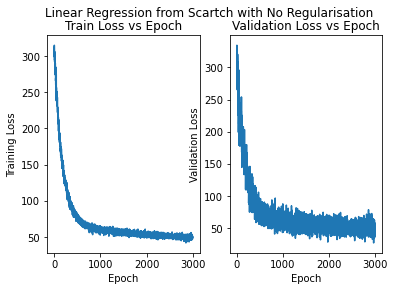


The linear regression from scratch method got MSE: 62.551206681126544
The linear regression from scratch method got R2 score: -2.1646895857511628

The linear regression using sklearn method got MSE: 11.042369757980886
The linear regression using sklearn method got R2 score: 0.5747166494880216


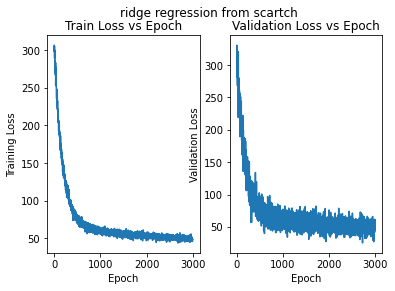


The ridge regression from scratch method got MSE: 62.56388534820949
The ridge regression from scratch method got R2 score: -2.1651934778668105

The ridge regression using sklearn method got MSE: 11.176785314455762
The ridge regression using sklearn method got R2 score: 0.5498372438901855


In [15]:
# Initialise our dataset
dataset, label=loadBoston()
# Modify the dataset by adding an extra column
modifiedDataset=addColumn(dataset)

# Split the dataset in case we need the test set for comparison
data=splitDataset(modifiedDataset, label, trainProportion=0.7, validationProportion=0.2)

# 1. Closed Solution from Scratch
thetaClosed=closedSolution(modifiedDataset, label)
predictionClosed=predict(data["testPoint"], thetaClosed)
evaluate(predictionClosed, data["testLabel"], "closed solution")
print(" ")

# 2. Linear Regression with No Regurlarisation from Scratch
thetaLinear=linearRegression(modifiedDataset, label, epoch=3000, learningRate=0.00000001, trainProportion=0.7, validationProportion=0.2, plot=True)

# 3. Linear Regression Using Sklearn
linearModel=linearRegressionSklearn(dataset, label, trainProportion=0.7, validationProportion=0.2)

# 4. Ridge Regression from Scratch
thetaRidge=ridgeRegression(modifiedDataset, label, epoch=3000, learningRate=0.00000001, regularisationCoefficient=1, trainProportion=0.7, validationProportion=0.2, plot=True)

# 5. Ridge Regression Using Sklearn
ridgeModel=ridgeRegressionSklearn(dataset, label, regularisationCoefficient=1, trainProportion=0.7, validationProportion=0.2)

It has been clearly shown that the results from the linear regression (scratch) and the ridge regression (scratch) have a relatively high MSE and negative R2 score, but the training loss plot looks good.

***This means that the gradient descent method was working properly, but there were something wrong within the whole pipeline.***

When we encounter this situation, usually we could do the following things:

1. Check there are any problems within the dataset (as data is the most important thing in the machine learning).

2. Check there are any problems within the algorithm. This is a very complex and difficult work, but we do have some recommended methods:

    a. Split the algorithm into lots of functions and test each of them (initialise theta, calculate loss, update theta...)

    b. Run the algorithm using a toy dataset, which has a very small dataset size and could be debugged easily.

3. If the dataset and the algorithm are all good, we could try tuning the model (change the important parameters called hyperparameters and check the performance)

    In our cases, we could try to change ***epoch, learning rate, trainProportion, validationProportion, regularisationCoefficient (if it is ridge regression)***

#### 7.1 Dataset Pre-processing
If you print the whole dataset, you will find that every feature has its own scale (minimum value and maximum value).

This inconsistency will significantly affect the model performance as the model can't determine which feature has a greater influence on the result.

Also, by scaling down the dataset, it could help the gradient descent method converges much more quickly towards the minima point.

This is achieved by using the StandardScaler in the sklearn API.

In [16]:
from sklearn.preprocessing import StandardScaler

def standardScale(dataset):
    '''
        Scale down the dataset so they share the same scale

        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    
    Argument:
        dataset: np.ndarray, all houses with 13 features, (the number of houses, the number of features for each house)

    Return:
        result: np.ndarray, the scaled dataset, (the number of houses, the number of features for each house) 
    '''
    scaler=StandardScaler()
    return scaler.fit_transform(dataset)

dataset, label=loadBoston()
scaledDataset=standardScale(dataset)
print("The original first 3 points in the dataset are:")
print(dataset[:3])
print("-------------------------------------------------")
print("The scaled first 3 points in the dataset are:")
print(scaledDataset[:3])

The original first 3 points in the dataset are:
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
-------------------------------------------------
The scaled first 3 points in the dataset are:
[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.

Let's train our models using scaled dataset and compare results again!


The closed solution method got MSE: 9.26872725250018
The closed solution method got R2 score: 0.5850251585492692
 


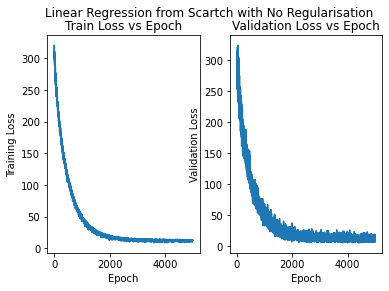


The linear regression from scratch method got MSE: 10.1931338120093
The linear regression from scratch method got R2 score: 0.504261386278569

The linear regression using sklearn method got MSE: 11.372560515709702
The linear regression using sklearn method got R2 score: 0.5920923969536869


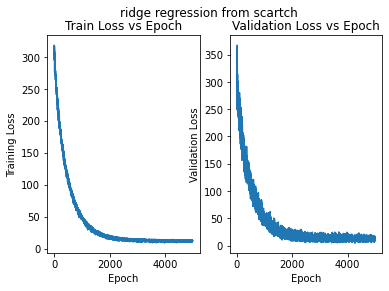


The ridge regression from scratch method got MSE: 10.19852642953488
The ridge regression from scratch method got R2 score: 0.5041382916193631

The ridge regression using sklearn method got MSE: 11.743131197120793
The ridge regression using sklearn method got R2 score: 0.5467325725512151


In [17]:
# Initialise our dataset
dataset, label=loadBoston()
# Scale the dataset
dataset=standardScale(dataset)
# Modify the dataset by adding an extra column
modifiedDataset=addColumn(dataset)

# Split the dataset in case we need the test set for comparison
data=splitDataset(modifiedDataset, label, trainProportion=0.7, validationProportion=0.2)

# 1. Closed Solution from Scratch
thetaClosed=closedSolution(modifiedDataset, label)
predictionClosed=predict(data["testPoint"], thetaClosed)
evaluate(predictionClosed, data["testLabel"], "closed solution")
print(" ")

# 2. Linear Regression with No Regurlarisation from Scratch
thetaLinear=linearRegression(modifiedDataset, label, epoch=5000, learningRate=0.001, trainProportion=0.7, validationProportion=0.2, plot=True)

# 3. Linear Regression Using Sklearn
linearModel=linearRegressionSklearn(dataset, label, trainProportion=0.7, validationProportion=0.2)

# 4. Ridge Regression from Scratch
thetaRidge=ridgeRegression(modifiedDataset, label, epoch=5000, learningRate=0.001, regularisationCoefficient=0.0001, trainProportion=0.7, validationProportion=0.2, plot=True)

# 5. Ridge Regression Using Sklearn
ridgeModel=ridgeRegressionSklearn(dataset, label, regularisationCoefficient=0.0001, trainProportion=0.7, validationProportion=0.2)

This time the result looks much better and the difference between the scratched version and the sklearn version is much smaller.

You might also observe that the loss plots are "thinner" than the one when using original dataset. This means that the fluctuation in the loss was much smaller, which is another powerful proof
of better loss convergence.

#### 7.2 Feature Selection
Another common method to improve the performance of the model is the feature selection. 

The core idea is that ***we want to use the most "important" features, which could significantly influence the prediction, to train the model and ignore those unnecessary features.***

For example, when considering the price of the house, normally we think important features are ***the area, location, traffic...***, we don't really care about ***the number of rubbish bins in the street***.

There are lots of ways to determine the correlation between those features and the label. A very common and efficient method is to use the Pearson's correlation and check the heat map.

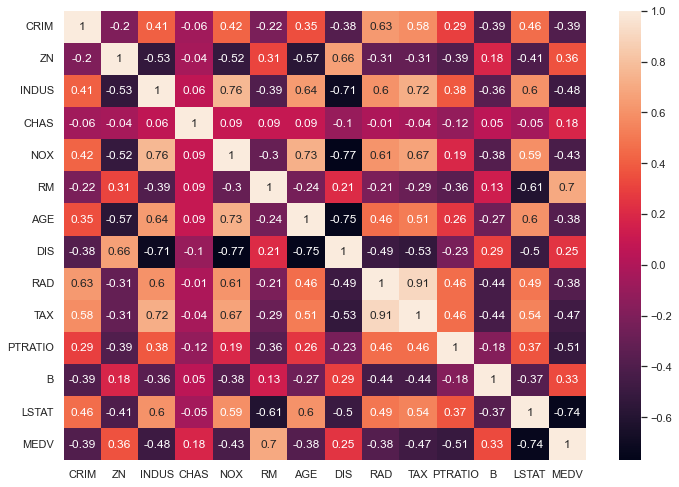

In [18]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston

def plotHeatMap():
    '''
        Plot the heat map for the boston dataset, which could be used to determine
    the linear relationships between all features
    '''
    # Load the boston dataset from the sklearn API
    dataset=load_boston()
    # Construct a pandas DataFraame and also add the target value as a column
    dataFrame=pd.DataFrame(dataset.data, columns=dataset.feature_names)
    dataFrame["MEDV"]=dataset.target
    # Find the correlation matrix
    correlationMatrix=dataFrame.corr().round(2)
    # Plot the heat map using the seaborn API
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.heatmap(data=correlationMatrix, annot=True)

plotHeatMap()

There are 2 very important observations:

1. We could find out that the feature ***RM*** and ***LSTAT*** have a relatively very strong linear relationship (0.7 and -0.74 respectively) with ***MEDV***. This means that the prediction has a very big chance to be accurate if we rely on those features.

2. We could also find out that the feature ***TAX*** and ***RAD*** have a very strong linear relationship (0.91) with each other. This will definitely cause problems if we train the model using both of them. If those features has already had strong relationships, the model can't distinguish the effect from them. This also applies to ***NDX*** and ***DIS***.

According to this correlation information, you could select your own combinations of features to train the model.

As you can see, here we just introduce the concept of linear regression and show you a good starting point to solve a real-life problem. There are still lots of things we have to do to get a good result in the end.

But we do sincerely hope that by reading and following this tutorial, you could understand regression more deeply and feel the power of machine learning. This is definitely a wonderful field where you could use your creativiy and innovation to make things possible.

### 8. Summary
1. Regression analysis is the process to find the relationship between the ***dependent variable*** and the ***independent variable***.

2. Supervised Learning is the machine learning task to learn a mapping between the input features and the output and the goal is to ***generalise from the training data to accurately find the result for unseen data***.

3. There are 2 general methods to solve the linear regression:

    a. Closed form solution: this could directly find the solution but can't be used when we don't have enough data and the size of dataset is too large.

    b. Gradient descent based solution: this could find the solution by looking for the gradient at each step. This could work very efficiently for large dataset but very difficult to tune.

4. Regularisation could be considered as a resistance for model to perfectly fit the training data. This could be used to solve the over-fitting problem.

5. When the result doesn't look right, we could:

    a. Check the data, whether you use the same scale for all features, whether there are strong relationships between features.

    b. Check the model, this could be done by separately checking each functions and test the performance on a small toy dataset.

    c. Tune the model by using different combinations of hyperparameters.